In [34]:
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from dotenv import load_dotenv
import os

load_dotenv()

#print(os.getenv('TEMP2'))
wine_data = pd.read_csv('data/wine-clustering.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
wine_data[wine_data.columns] = sk.preprocessing.StandardScaler().fit_transform(wine_data)
print(wine_data.describe)

<bound method NDFrame.describe of       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1    0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2    0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3    1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4    0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   
..        ...         ...       ...           ...        ...            ...   
173  0.876275    2.974543  0.305159      0.301803  -0.332922      -0.985614   
174  0.493343    1.412609  0.414820      1.052516   0.158572      -0.793334   
175  0.332758    1.744744 -0.389355      0.151661   1.422412      -1.129824   
176  0.209232    0.227694  0.012732      0.151661   1.422412      -1.033684   
177  1.395086    1.583165  1.365208      1.502943  -0.262708      -0.392751   

     Flavanoids  

In [36]:
# PCA method chosen for dimensionality reduction
pca_3 = PCA(n_components=3)
pca_3_wine_data = pca_3.fit_transform(wine_data)
print(pca_3.explained_variance_ratio_, sum(pca_3.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631] 0.6652996889318525


In [37]:
pca_3_features = pd.DataFrame(abs(pca_3.components_), columns=wine_data.columns, index=['pc_1', 'pc_2', 'pc_3'])
print(pca_3_features)

       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
pc_1  0.144329    0.245188  0.002051      0.239320   0.141992       0.394661   
pc_2  0.483652    0.224931  0.316069      0.010591   0.299634       0.065040   
pc_3  0.207383    0.089013  0.626224      0.612080   0.130757       0.146179   

      Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
pc_1    0.422934              0.298533         0.313429         0.088617   
pc_2    0.003360              0.028779         0.039302         0.529996   
pc_3    0.150682              0.170368         0.149454         0.137306   

           Hue     OD280   Proline  
pc_1  0.296715  0.376167  0.286752  
pc_2  0.279235  0.164496  0.364903  
pc_3  0.085222  0.166005  0.126746  


In [38]:
# Key features at 0.25 threshold
print('pc_1 features:\n', (pca_3_features[pca_3_features > 0.25].iloc[0]).dropna())
print('pc_2 features:\n', (pca_3_features[pca_3_features > 0.25].iloc[1]).dropna())
print('pc_3 features:\n', (pca_3_features[pca_3_features > 0.25].iloc[2]).dropna())

pc_1 features:
 Total_Phenols           0.394661
Flavanoids              0.422934
Nonflavanoid_Phenols    0.298533
Proanthocyanins         0.313429
Hue                     0.296715
OD280                   0.376167
Proline                 0.286752
Name: pc_1, dtype: float64
pc_2 features:
 Alcohol            0.483652
Ash                0.316069
Magnesium          0.299634
Color_Intensity    0.529996
Hue                0.279235
Proline            0.364903
Name: pc_2, dtype: float64
pc_3 features:
 Ash             0.626224
Ash_Alcanity    0.612080
Name: pc_3, dtype: float64


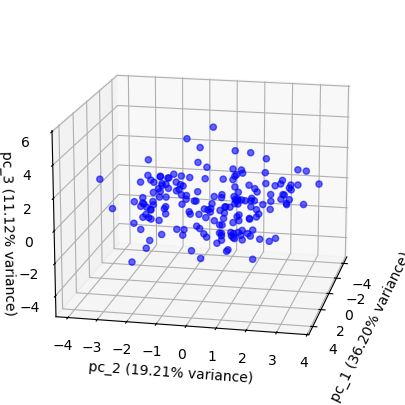

In [70]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

x = pca_3_wine_data[:, 0]
y = pca_3_wine_data[:, 1]
z = pca_3_wine_data[:, 2]

ax.scatter(x, y, z, c='b', marker='o', alpha=0.6)

ax.set_xlabel(f'pc_1 ({pca_3.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'pc_2 ({pca_3.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'pc_3 ({pca_3.explained_variance_ratio_[2]:.2%} variance)', rotation=90)
ax.zaxis.labelpad=-0.7
ax.view_init(elev=16, azim=12)
plt.show()